In [3]:
import pandas as pd
from plotly.offline import plot, iplot
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
import cufflinks as cf  
cf.go_offline()  
data=pd.read_csv(r"C:\Users\Rayhan\Downloads\heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.isnull().sum().sum()

0

In [5]:
print(data.info)
data.isnull().sum()


<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.iplot(kind='bar', x=['age', 'ca'],y='target') 

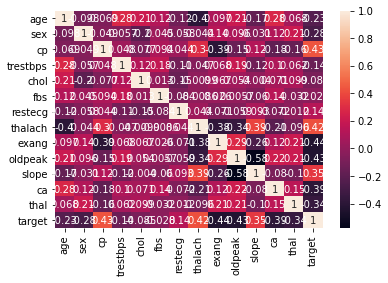

In [7]:
corr = data.corr()
sns.heatmap(corr,annot=True);

In [8]:
class Report:
    def __init__(self, X_test, y_test):
        self.X = X_test
        self.y = y_test
    
    def metrics(self, model):
        y_pred = model.predict(self.X)
        
        print('Accuracy score:\n')
        print(accuracy_score(self.y, y_pred))
        
        print('\nConfusion Matrix:\n')
        print(confusion_matrix(self.y, y_pred))
        
        print('\nClassification Report:\n')
        print(classification_report(self.y, y_pred))
    
    def plot_roc_curve(self, model, part='h1', save=False):
        probs = model.predict_proba(self.X)
        preds = probs[:, 1]

        fpr, tpr, threshold = roc_curve(self.y, preds)
        roc_auc = auc(fpr, tpr)

        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        
        plt.show()

In [9]:
x = data[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]]

y = data["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  

Accuracy=0.83
Accuracy score:

0.8289473684210527

Confusion Matrix:

[[24  9]
 [ 4 39]]

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.81      0.91      0.86        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



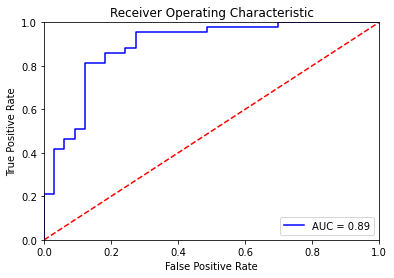

In [12]:
log = LogisticRegression(max_iter=1200).fit(x_train, y_train)
report = Report(x_test, y_test)
y_pred  = log.predict(x_test)    
print("Accuracy={:.2f}".format(log.score(x_test, y_test)))
report.metrics(log)
report.plot_roc_curve(log)

In [13]:
cross_val_score(log,  x_test, y_test, cv=10).mean()

0.8267857142857142

Accuracy score:

0.6447368421052632

Confusion Matrix:

[[18 15]
 [12 31]]

Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.55      0.57        33
           1       0.67      0.72      0.70        43

    accuracy                           0.64        76
   macro avg       0.64      0.63      0.63        76
weighted avg       0.64      0.64      0.64        76



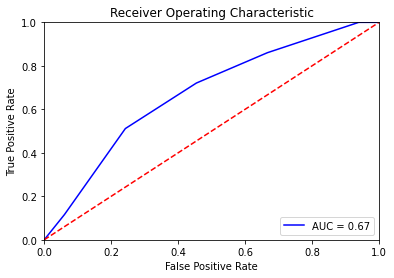

In [14]:
knn = KNeighborsClassifier().fit(x_train, y_train)
report.metrics(knn)
report.plot_roc_curve(knn)

Accuracy score:

0.75

Confusion Matrix:

[[16 17]
 [ 2 41]]

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.48      0.63        33
           1       0.71      0.95      0.81        43

    accuracy                           0.75        76
   macro avg       0.80      0.72      0.72        76
weighted avg       0.79      0.75      0.73        76



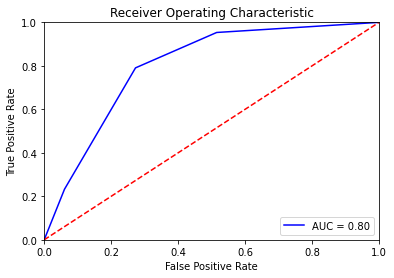

In [15]:
cart = DecisionTreeClassifier(max_depth=2).fit(x_train, y_train)
report.metrics(cart)
report.plot_roc_curve(cart)

Accuracy score:

0.8421052631578947

Confusion Matrix:

[[25  8]
 [ 4 39]]

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        33
           1       0.83      0.91      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.84        76
weighted avg       0.84      0.84      0.84        76



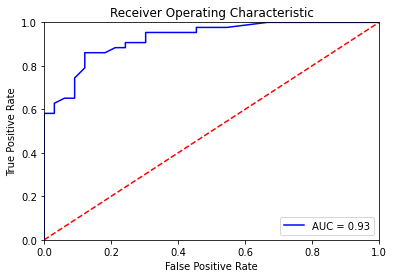

In [17]:
rf = RandomForestClassifier().fit(x_train, y_train)
report.metrics(rf)
report.plot_roc_curve(rf)